In [1]:
import pandas as pd

In [38]:
ess = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [7]:
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [13]:
total_missing = ess.isnull().sum().sort_values(ascending=False)
percent_missing = (ess.isnull().sum()/ess.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
agea,239,0.027810
sclact,94,0.010938
pplfair,39,0.004538
happy,31,0.003607
pplhlp,25,0.002909
partner,17,0.001978
sclmeet,15,0.001745
ppltrst,14,0.001629
gndr,10,0.001164
tvtot,8,0.000931


In [45]:
ess.cntry.value_counts()

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

## 1.Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

## All Countries

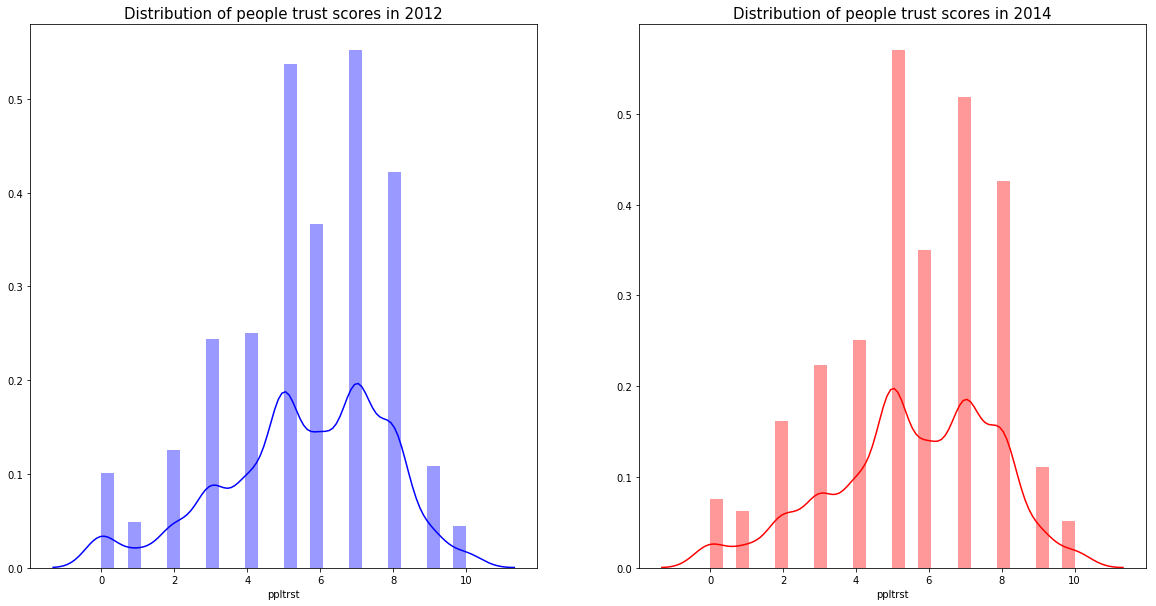

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.distplot(ess['ppltrst'][ess['year'] == 6].dropna(), color = 'blue')
plt.title('Distribution of people trust scores in 2012', fontsize = 15)

plt.subplot(1,2,2)
sns.distplot(ess['ppltrst'][ess['year'] == 7].dropna(), color = 'red')
plt.title('Distribution of people trust scores in 2014', fontsize = 15)

plt.show()

### Normality Test

In [81]:
k2, p = stats.normaltest(ess['ppltrst'][(ess['year'] == 6)].dropna())
alpha = 0.05
print('Normality test for people trust distribution in 2012')
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected and the distribution is Normal")
else:
    print("The null hypothesis cannot be rejected and the distribution is not Normal")
print('------------------------------------------------------------------------------------------')
k2, p = stats.normaltest(ess['ppltrst'][(ess['year'] == 7)].dropna())
alpha = 0.05
print('Normality test for people trust distribution in 2014')
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected and the distribution is Normal")
else:
    print("The null hypothesis cannot be rejected and the distribution is not Normal")
print('------------------------------------------------------------------------------------------')

Normality test for people trust distribution in 2012
p = 2.60429e-41
The null hypothesis can be rejected and the distribution is Normal
------------------------------------------------------------------------------------------
Normality test for people trust distribution in 2014
p = 1.14706e-33
The null hypothesis can be rejected and the distribution is Normal
------------------------------------------------------------------------------------------


### T-Test for Independant Samples

In [116]:
import scipy.stats as stats
print(stats.ttest_ind(ess['ppltrst'][ess['year'] == 6], ess['ppltrst'][ess['year'] == 7], nan_policy='omit'))

Ttest_indResult(statistic=0.13222510058441272, pvalue=0.8948093492517359)


In general, no difference in terms of trust between 2012 and 2014.

## Independent Countries

In [44]:
countries = ess.cntry.unique().tolist()

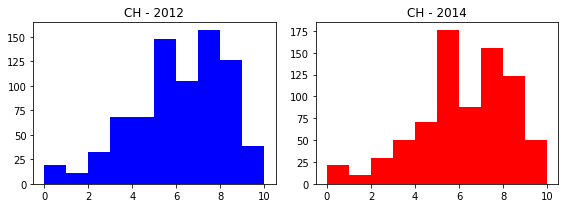

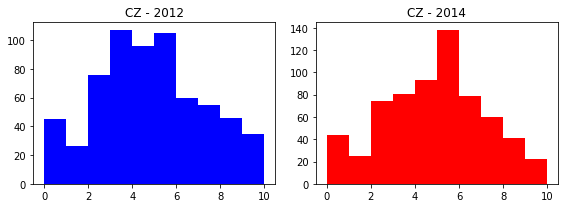

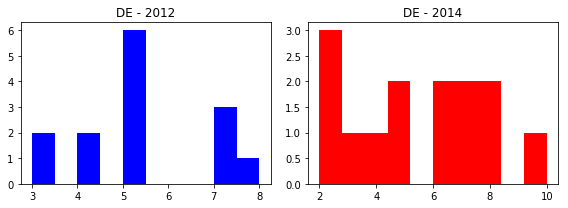

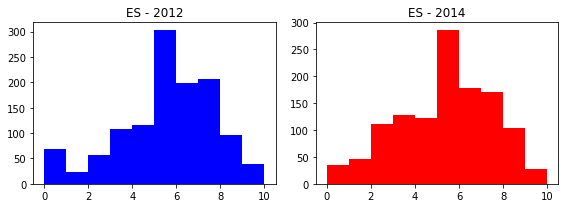

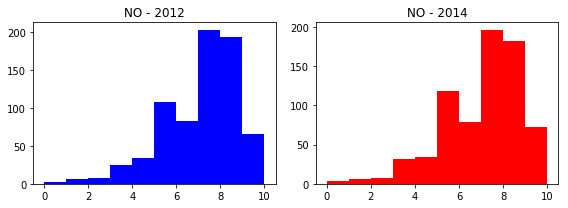

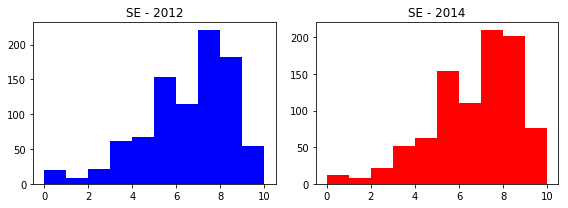

In [121]:
for country in countries:
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 3))
    
    axs[0].hist(ess['ppltrst'][(ess['year'] == 6) & (ess['cntry'] == country)].dropna(), color = 'blue')
    axs[1].hist(ess['ppltrst'][(ess['year'] == 7) & (ess['cntry'] == country)].dropna(), color = 'red')

    axs[0].set_title(country + ' - 2012')
    axs[1].set_title(country + ' - 2014')
    plt.tight_layout()
    plt.show()

### Normality Test

In [67]:
for country in countries:
    k2, p = stats.normaltest(ess['ppltrst'][(ess['year'] == 6) & (ess['cntry'] == country)].dropna())
    alpha = 0.05
    print('Normality test for people trust distribution in 2012 for ' + country)
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
         print("The null hypothesis can be rejected and the distribution is Normal")
    else:
         print("The null hypothesis cannot be rejected and the distribution is not Normal")
    print('------------------------------------------------------------------------------------------')
    k2, p = stats.normaltest(ess['ppltrst'][(ess['year'] == 7) & (ess['cntry'] == country)].dropna())
    print('Normality test for people trust distribution in 2014 for ' + country)
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
         print("The null hypothesis can be rejected and the distribution is Normal")
    else:
         print("The null hypothesis cannot be rejected and the distribution is not Normal")
    print('------------------------------------------------------------------------------------------')

Normality test for people trust distribution in 2012 for CH
p = 3.36579e-08
The null hypothesis can be rejected and the distribution is Normal
------------------------------------------------------------------------------------------
Normality test for people trust distribution in 2014 for CH
p = 1.08598e-07
The null hypothesis can be rejected and the distribution is Normal
------------------------------------------------------------------------------------------
Normality test for people trust distribution in 2012 for CZ
p = 3.63579e-06
The null hypothesis can be rejected and the distribution is Normal
------------------------------------------------------------------------------------------
Normality test for people trust distribution in 2014 for CZ
p = 0.018173
The null hypothesis can be rejected and the distribution is Normal
------------------------------------------------------------------------------------------
Normality test for people trust distribution in 2012 for DE
p = 0.7

C:\Users\rabia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))
C:\Users\rabia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


- All distribution are normal except for 'Germany' 'DE' <br>
- t-test for independent samples will be performed on all countries distributions in 2012 and 2014. <br>
- Kruskal-wallis test will be performed on germany distribtion in 2012 and 2014

### T-Test for Independant Samples

In [117]:
countries_n = ['CH', 'CZ', 'ES', 'NO', 'SE']
for country in countries_n:
    print('t-test for people trust between 2012 and 2014 in country ' + country)
    print(stats.ttest_ind(ess['ppltrst'][(ess['year'] == 6) & (df['cntry']== country)], 
                          ess['ppltrst'][(ess['year'] == 7) & (df['cntry']== country)], nan_policy='omit'))
    print('------------------------------------------------------------------------------------------')

t-test for people trust between 2012 and 2014 in country CH
Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.49770110247151234)
------------------------------------------------------------------------------------------
t-test for people trust between 2012 and 2014 in country CZ
Ttest_indResult(statistic=-0.47654431369598554, pvalue=0.6337663626855166)
------------------------------------------------------------------------------------------
t-test for people trust between 2012 and 2014 in country ES
Ttest_indResult(statistic=2.4942765167160026, pvalue=0.012687599930346013)
------------------------------------------------------------------------------------------
t-test for people trust between 2012 and 2014 in country NO
Ttest_indResult(statistic=0.5437669865283744, pvalue=0.586684963598745)
------------------------------------------------------------------------------------------
t-test for people trust between 2012 and 2014 in country SE
Ttest_indResult(statistic=-2.0891648431

Spain (ES), and Sweeden (SE) are the only countries with a significant difference in trust between 2012 and 2014. <br>
The people of Sweeden trust score increased while in Spain(ES) the trust score decreased.

### Kruskal-wallis Test

In [75]:
print('Kruskal_wallis test for people trust between 2012 and 2014 in Germany "DE"')
print(stats.wilcoxon(ess['ppltrst'][(ess['year'] == 6) & (df['cntry']== 'DE')], 
                          ess['ppltrst'][(ess['year'] == 7) & (df['cntry']== 'DE')], zero_method='wilcox'))

Kruskal_wallis test for people trust between 2012 and 2014 in Germany "DE"
WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)


No difference in people trust in Germany between 2012 and 2014.

**In general, no the people trust did not decrease from 2012 to 2014. the only excetion is in Spain where people trust decreased, while the opposite happened in Sweeden and people trust increased.**

## 2.Did people become happier from 2012 to 2014? Compute results for each country in the sample.

## All Countries

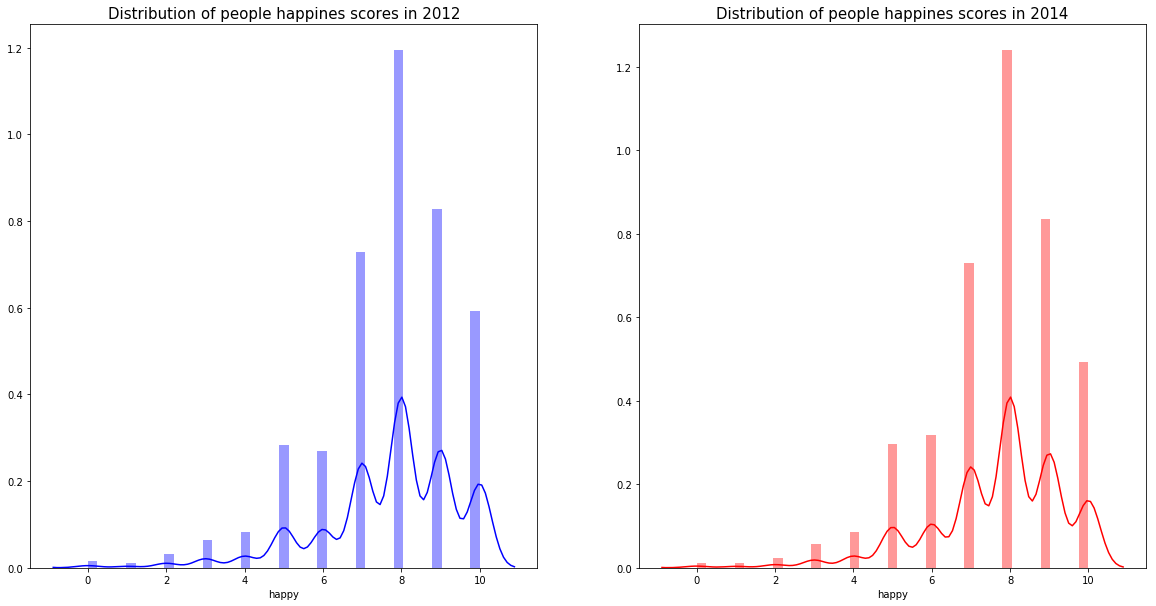

In [80]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.distplot(ess['happy'][ess['year'] == 6].dropna(), color = 'blue')
plt.title('Distribution of people happines scores in 2012', fontsize = 15)

plt.subplot(1,2,2)
sns.distplot(ess['happy'][ess['year'] == 7].dropna(), color = 'red')
plt.title('Distribution of people happines scores in 2014', fontsize = 15)

plt.show()

### Normality Test

In [91]:
k2, p = stats.normaltest(ess['happy'][(ess['year'] == 6)].dropna())
alpha = 0.05
print('Normality test for people happines distribution in 2012')
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected and the distribution is Normal")
else:
    print("The null hypothesis cannot be rejected and the distribution is not Normal")
print('------------------------------------------------------------------------------------------')
k2, p = stats.normaltest(ess['happy'][(ess['year'] == 7)].dropna())
alpha = 0.05
print('Normality test for people happines distribution in 2014')
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected and the distribution is Normal")
else:
    print("The null hypothesis cannot be rejected and the distribution is not Normal")
print('------------------------------------------------------------------------------------------')

Normality test for people happines distribution in 2012
p = 2.86664e-175
The null hypothesis can be rejected and the distribution is Normal
------------------------------------------------------------------------------------------
Normality test for people happines distribution in 2014
p = 1.38049e-160
The null hypothesis can be rejected and the distribution is Normal
------------------------------------------------------------------------------------------


### T-Test for Independent Samples

In [118]:
import scipy.stats as stats
print(stats.ttest_ind(ess['happy'][ess['year'] == 6], ess['happy'][ess['year'] == 7], nan_policy='omit'))

Ttest_indResult(statistic=1.5417667656036744, pvalue=0.12316724103860867)


In general, no difference in terms of happines between 2012 and 2014.

## Independent Countries

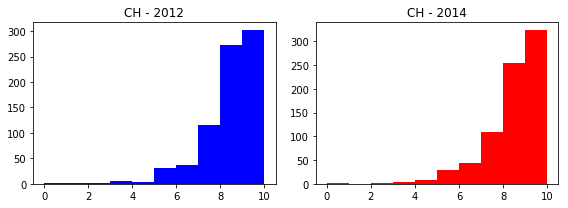

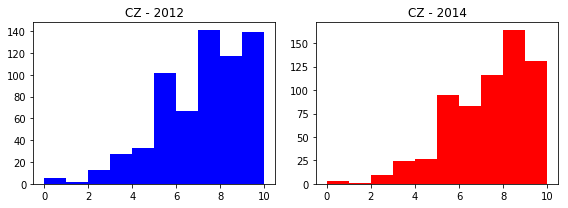

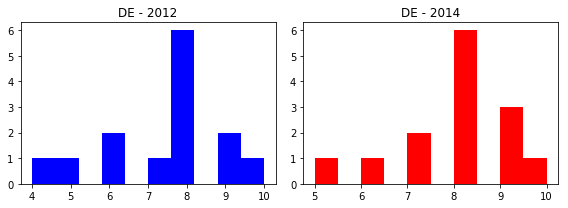

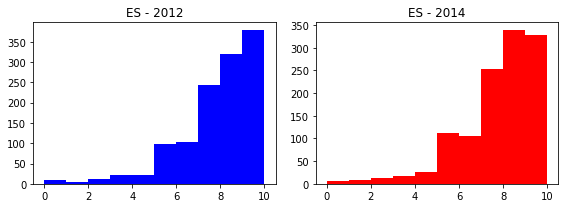

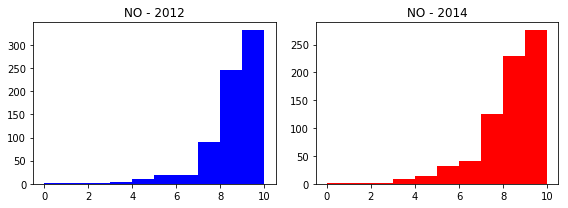

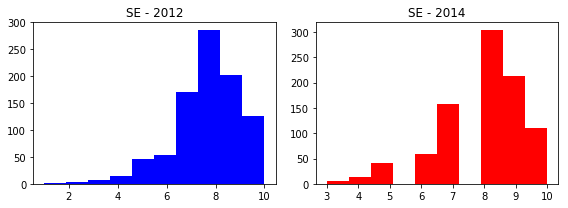

In [122]:
for country in countries:
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 3))
    
    axs[0].hist(ess['happy'][(ess['year'] == 6) & (ess['cntry'] == country)].dropna(), color = 'blue')
    axs[1].hist(ess['happy'][(ess['year'] == 7) & (ess['cntry'] == country)].dropna(), color = 'red')

    axs[0].set_title(country + ' - 2012')
    axs[1].set_title(country + ' - 2014')
    plt.tight_layout()
    plt.show()

### Normality Test

In [96]:
for country in countries:
    k2, p = stats.normaltest(ess['happy'][(ess['year'] == 6) & (ess['cntry'] == country)].dropna())
    alpha = 0.05
    print('Normality test for people happines distribution in 2012 for ' + country)
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
         print("The null hypothesis can be rejected and the distribution is Normal")
    else:
         print("The null hypothesis cannot be rejected and the distribution is not Normal")
    print('------------------------------------------------------------------------------------------')
    k2, p = stats.normaltest(ess['happy'][(ess['year'] == 7) & (ess['cntry'] == country)].dropna())
    print('Normality test for people happines distribution in 2014 for ' + country)
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
         print("The null hypothesis can be rejected and the distribution is Normal")
    else:
         print("The null hypothesis cannot be rejected and the distribution is not Normal")
    print('------------------------------------------------------------------------------------------')

Normality test for people happines distribution in 2012 for CH
p = 1.2009e-41
The null hypothesis can be rejected and the distribution is Normal
------------------------------------------------------------------------------------------
Normality test for people happines distribution in 2014 for CH
p = 8.7749e-35
The null hypothesis can be rejected and the distribution is Normal
------------------------------------------------------------------------------------------
Normality test for people happines distribution in 2012 for CZ
p = 5.84057e-08
The null hypothesis can be rejected and the distribution is Normal
------------------------------------------------------------------------------------------
Normality test for people happines distribution in 2014 for CZ
p = 9.66543e-10
The null hypothesis can be rejected and the distribution is Normal
------------------------------------------------------------------------------------------
Normality test for people happines distribution in 201

C:\Users\rabia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))
C:\Users\rabia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


- All distribution are normal except for 'Germany' 'DE' <br>
- t-test for independent samples will be performed on all countries distributions in 2012 and 2014. <br>
- Kruskal-wallis test will be performed on germany distribtion in 2012 and 2014

### T-Test for Independent Samples

In [109]:
for country in countries_n:
    print('t-test for people happines between 2012 and 2014 in country ' + country)
    print(stats.ttest_ind(ess['happy'][(ess['year'] == 6) & (df['cntry']== country)], 
                          ess['happy'][(ess['year'] == 7) & (df['cntry']== country)], nan_policy='omit'))
    print('------------------------------------------------------------------------------------------')

t-test for people happines between 2012 and 2014 in country CH
Ttest_indResult(statistic=-0.3883916732706544, pvalue=0.6977798552552132)
------------------------------------------------------------------------------------------
t-test for people happines between 2012 and 2014 in country CZ
Ttest_indResult(statistic=-1.3033790688858846, pvalue=0.19267687243588685)
------------------------------------------------------------------------------------------
t-test for people happines between 2012 and 2014 in country ES
Ttest_indResult(statistic=1.6739845099484867, pvalue=0.09426276206942426)
------------------------------------------------------------------------------------------
t-test for people happines between 2012 and 2014 in country NO
Ttest_indResult(statistic=4.26539164981969, pvalue=2.1241259786819524e-05)
------------------------------------------------------------------------------------------
t-test for people happines between 2012 and 2014 in country SE
Ttest_indResult(statist

Only happines for the people of Norway "NO" has changed between 2012 and 2014. People of Norway happines decreased in 2014 compare to 2012

### Kruskal-wallis Test

In [99]:
print('Kruskal_wallis test for people trust between 2012 and 2014 in Germany "DE"')
print(stats.wilcoxon(ess['happy'][(ess['year'] == 6) & (df['cntry']== 'DE')], 
                          ess['happy'][(ess['year'] == 7) & (df['cntry']== 'DE')], zero_method='wilcox'))

Kruskal_wallis test for people trust between 2012 and 2014 in Germany "DE"
WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)


No difference in people happines in Germany between 2012 and 2014.

**People happines did not increase from 2012 to 2014. No change in happines between those years. The onlky exception was a deecrease in happoines in Norway "NO"**

# 3.Who reported watching more TV in 2012, men or women?

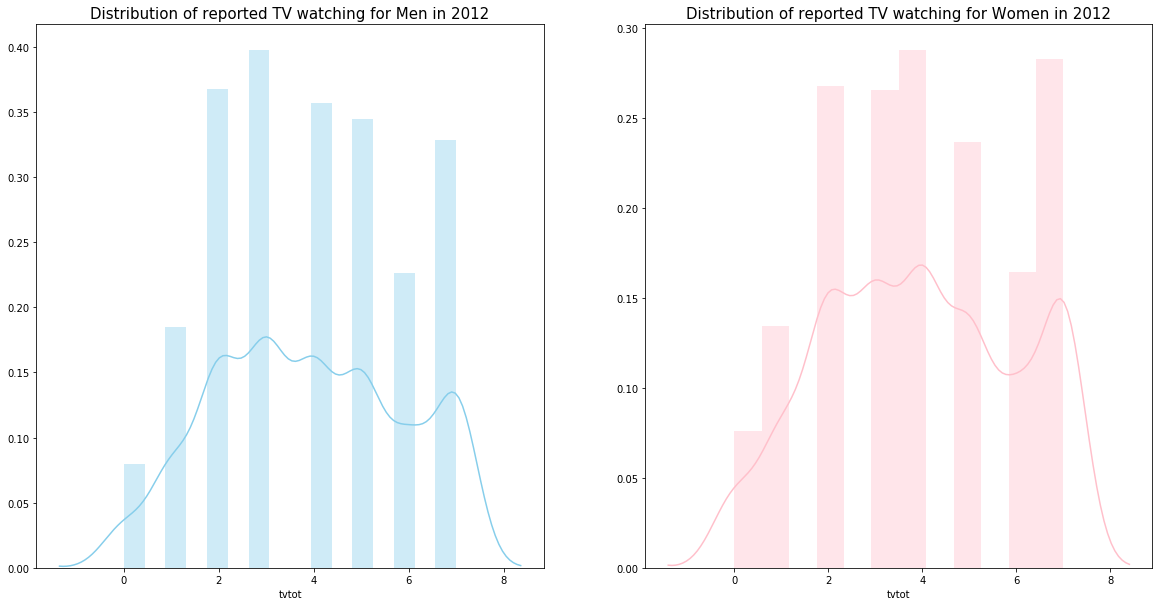

In [110]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.distplot(ess['tvtot'][(ess['year'] == 6) & (ess['gndr'] == 1)].dropna(), color = 'skyblue')
plt.title('Distribution of reported TV watching for Men in 2012', fontsize = 15)

plt.subplot(1,2,2)
sns.distplot(ess['tvtot'][(ess['year'] == 6) & (ess['gndr'] == 2)].dropna(), color = 'pink')
plt.title('Distribution of reported TV watching for Women in 2012', fontsize = 15)

plt.show()

### Normality Test

In [111]:
k2, p = stats.normaltest(ess['tvtot'][(ess['year'] == 6) & (ess['gndr'] == 1)].dropna())
alpha = 0.05
print('Normality test for reported TV watching for Men distribution in 2012')
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected and the distribution is Normal")
else:
    print("The null hypothesis cannot be rejected and the distribution is not Normal")
print('------------------------------------------------------------------------------------------')
k2, p = stats.normaltest(ess['tvtot'][(ess['year'] == 6) & (ess['gndr'] == 2)].dropna())
alpha = 0.05
print('Normality test for reported TV watching for Women distribution in 2012')
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected and the distribution is Normal")
else:
    print("The null hypothesis cannot be rejected and the distribution is not Normal")
print('-----------------------------------------------------------------------------------------')

Normality test for reported TV watching for Men distribution in 2012
p = 3.0126e-89
The null hypothesis can be rejected and the distribution is Normal
------------------------------------------------------------------------------------------
Normality test for reported TV watching for Women distribution in 2012
p = 1.20492e-103
The null hypothesis can be rejected and the distribution is Normal
-----------------------------------------------------------------------------------------


### T-Test for Independent Samples

In [119]:
import scipy.stats as stats
print(stats.ttest_ind(ess['tvtot'][(ess['year'] == 6) & (ess['gndr'] == 1)], 
                      ess['tvtot'][(ess['year'] == 6) & (ess['gndr'] == 2)], nan_policy='omit'))

Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.49023604027095813)


**There is no significant difference in reported watched TV between Men and women**

# 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

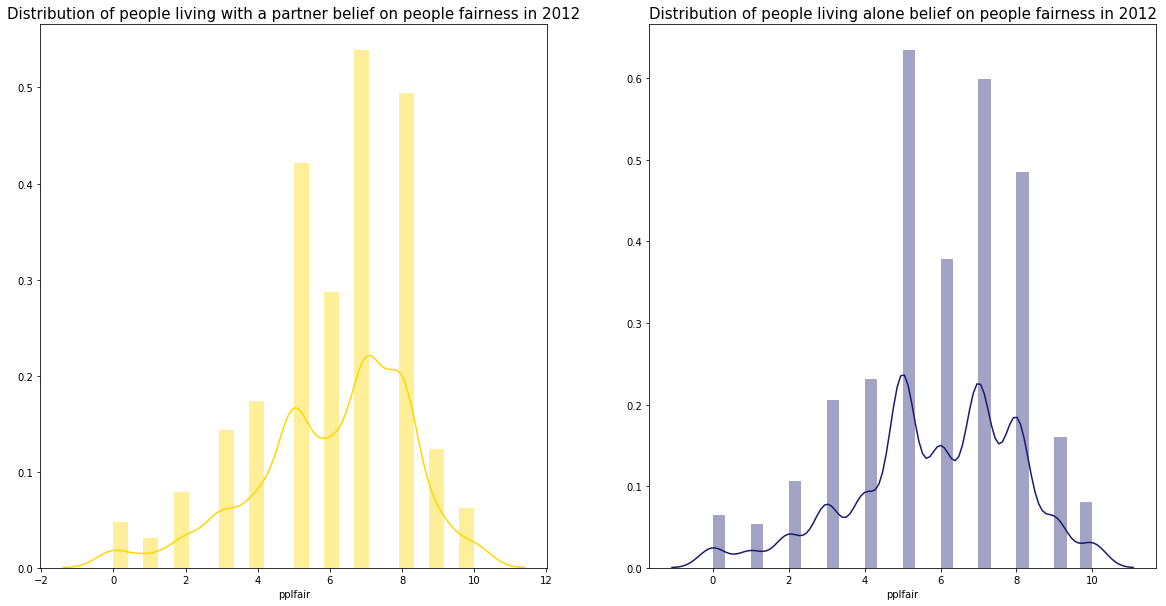

In [114]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.distplot(ess['pplfair'][(ess['year'] == 6) & (ess['partner'] == 1)].dropna(), color = 'gold')
plt.title('Distribution of people living with a partner belief on people fairness in 2012', fontsize = 15)

plt.subplot(1,2,2)
sns.distplot(ess['pplfair'][(ess['year'] == 6) & (ess['partner'] == 2)].dropna(), color = 'midnightblue')
plt.title('Distribution of people living alone belief on people fairness in 2012', fontsize = 15)

plt.show()

### Normality Test

In [115]:
k2, p = stats.normaltest(ess['pplfair'][(ess['year'] == 6) & (ess['partner'] == 1)].dropna())
alpha = 0.05
print('Normality test for people living with a partner belief on people fairness in 2012')
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected and the distribution is Normal")
else:
    print("The null hypothesis cannot be rejected and the distribution is not Normal")
print('------------------------------------------------------------------------------------------')
k2, p = stats.normaltest(ess['pplfair'][(ess['year'] == 6) & (ess['partner'] == 2)].dropna())
alpha = 0.05
print('Normality test for people living alone belief on people fairness in 2012')
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected and the distribution is Normal")
else:
    print("The null hypothesis cannot be rejected and the distribution is not Normal")
print('-----------------------------------------------------------------------------------------')

Normality test for people living with a partner belief on people fairness in 2012
p = 1.2825e-39
The null hypothesis can be rejected and the distribution is Normal
------------------------------------------------------------------------------------------
Normality test for people living alone belief on people fairness in 2012
p = 7.96156e-15
The null hypothesis can be rejected and the distribution is Normal
-----------------------------------------------------------------------------------------


### T-Test for Independent Samples

In [120]:
import scipy.stats as stats
print(stats.ttest_ind(ess['pplfair'][(ess['year'] == 6) & (ess['partner'] == 1)], 
                      ess['pplfair'][(ess['year'] == 6) & (ess['partner'] == 2)], nan_policy='omit'))

Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609876207)


**People who are living with a partner were more likely to believe people were fair in 2012 than the people who are living alone.**

# 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

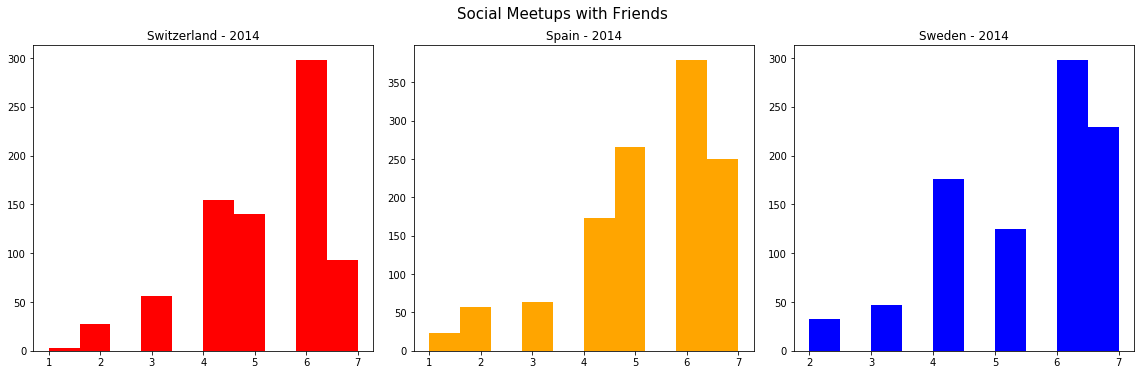

In [148]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
    
axs[0].hist(ess['sclmeet'][(ess['year'] == 7) & (ess['cntry'] == 'CH')].dropna(), color = 'red')
axs[1].hist(ess['sclmeet'][(ess['year'] == 7) & (ess['cntry'] == 'ES')].dropna(), color = 'orange')
axs[2].hist(ess['sclmeet'][(ess['year'] == 7) & (ess['cntry'] == 'SE')].dropna(), color = 'blue')

fig.text(0.4, 1, 'Social Meetups with Friends', fontsize = 15)
axs[0].set_title('Switzerland - 2014')
axs[1].set_title('Spain - 2014')
axs[2].set_title('Sweden - 2014')
plt.tight_layout()
plt.show()

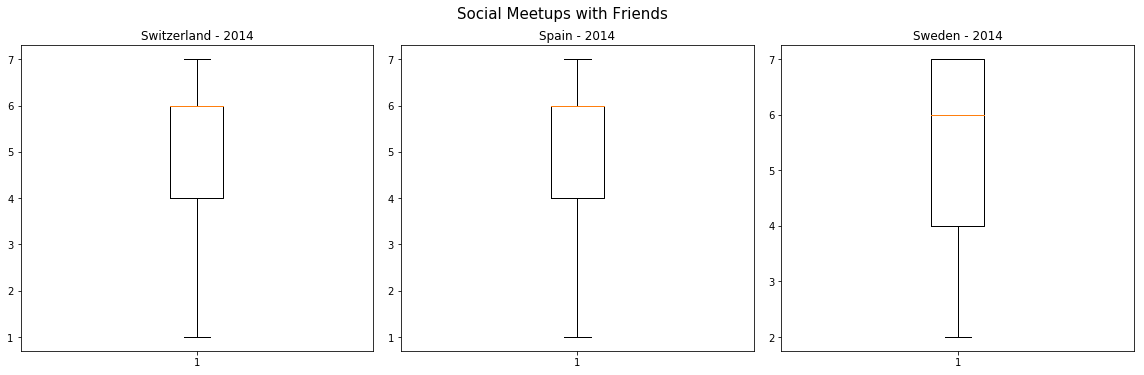

In [149]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

axs[0].boxplot(ess['sclmeet'][(ess['year'] == 7) & (ess['cntry'] == 'CH')].dropna())
axs[1].boxplot(ess['sclmeet'][(ess['year'] == 7) & (ess['cntry'] == 'ES')].dropna())
axs[2].boxplot(ess['sclmeet'][(ess['year'] == 7) & (ess['cntry'] == 'SE')].dropna())

fig.text(0.4, 1, 'Social Meetups with Friends', fontsize = 15)
axs[0].set_title('Switzerland - 2014')
axs[1].set_title('Spain - 2014')
axs[2].set_title('Sweden - 2014')
    
plt.tight_layout()
plt.show()

### One-Way ANOVA Test

In [131]:
F, p = stats.f_oneway(ess['sclmeet'][(ess['year'] == 7) & (ess['cntry'] == 'CH')].dropna(),
                      ess['sclmeet'][(ess['year'] == 7) & (ess['cntry'] == 'ES')].dropna(),
                      ess['sclmeet'][(ess['year'] == 7) & (ess['cntry'] == 'SE')].dropna())
print('F statistic:', F, '\np-value:', p)

F statistic: 7.8889073426891425 
p-value: 0.00038301513884460325


It appears that the three countries are likely to differ in the population

### T-Test for Independent Samples

In [133]:
print('t-test for social meetups with Friends between Switzerland and Spain in 2014')
print(stats.ttest_ind(ess['sclmeet'][(ess['year'] == 7) & (ess['cntry'] == 'CH')].dropna(),
                      ess['sclmeet'][(ess['year'] == 7) & (ess['cntry'] == 'ES')].dropna()))
print('------------------------------------------------------------------------------------------')
print('t-test for social meetups with Friends between Switzerland and Sweden in 2014')
print(stats.ttest_ind(ess['sclmeet'][(ess['year'] == 7) & (ess['cntry'] == 'CH')].dropna(),
                      ess['sclmeet'][(ess['year'] == 7) & (ess['cntry'] == 'SE')].dropna()))
print('------------------------------------------------------------------------------------------')
print('t-test for social meetups with Friends between Sweden and Spain in 2014')
print(stats.ttest_ind(ess['sclmeet'][(ess['year'] == 7) & (ess['cntry'] == 'SE')].dropna(),
                      ess['sclmeet'][(ess['year'] == 7) & (ess['cntry'] == 'ES')].dropna()))
print('------------------------------------------------------------------------------------------')


t-test for social meetups with Friends between Switzerland and Spain in 2014
Ttest_indResult(statistic=-1.5343317353073618, pvalue=0.12510774525042745)
------------------------------------------------------------------------------------------
t-test for social meetups with Friends between Switzerland and Sweden in 2014
Ttest_indResult(statistic=-4.037131044403062, pvalue=5.654598600313532e-05)
------------------------------------------------------------------------------------------
t-test for social meetups with Friends between Sweden and Spain in 2014
Ttest_indResult(statistic=2.649547268580078, pvalue=0.00811992279651295)
------------------------------------------------------------------------------------------


**- No difference on the number of social mettups between people in Spain and Switzerland** <br>
**- Swedish people are more likely to have more social meetups with friends than Spain and Switzerland people.**

# 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

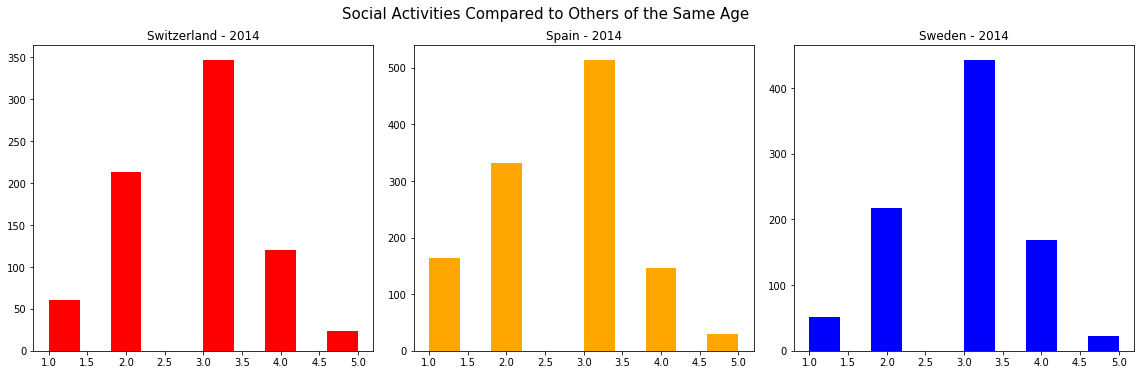

In [146]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
    
axs[0].hist(ess['sclact'][(ess['year'] == 7) & (ess['cntry'] == 'CH')].dropna(), color = 'red')
axs[1].hist(ess['sclact'][(ess['year'] == 7) & (ess['cntry'] == 'ES')].dropna(), color = 'orange')
axs[2].hist(ess['sclact'][(ess['year'] == 7) & (ess['cntry'] == 'SE')].dropna(), color = 'blue')

fig.text(0.3, 1, 'Social Activities Compared to Others of the Same Age', fontsize = 15)
axs[0].set_title('Switzerland - 2014')
axs[1].set_title('Spain - 2014')
axs[2].set_title('Sweden - 2014')
plt.tight_layout()
plt.show()

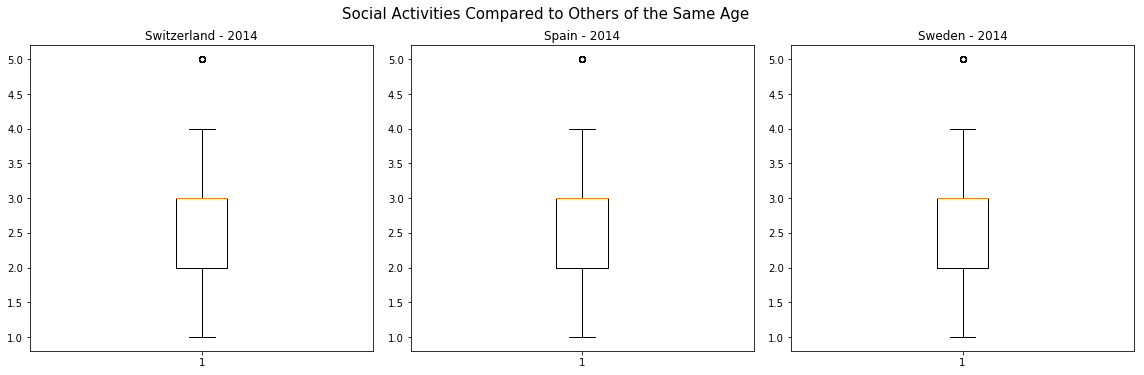

In [150]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

axs[0].boxplot(ess['sclact'][(ess['year'] == 7) & (ess['cntry'] == 'CH')].dropna())
axs[1].boxplot(ess['sclact'][(ess['year'] == 7) & (ess['cntry'] == 'ES')].dropna())
axs[2].boxplot(ess['sclact'][(ess['year'] == 7) & (ess['cntry'] == 'SE')].dropna())

fig.text(0.3, 1, 'Social Activities Compared to Others of the Same Age', fontsize = 15)
axs[0].set_title('Switzerland - 2014')
axs[1].set_title('Spain - 2014')
axs[2].set_title('Sweden - 2014')
plt.tight_layout()
plt.show()

### One-Way ANOVA Test

In [151]:
F, p = stats.f_oneway(ess['sclact'][(ess['year'] == 7) & (ess['cntry'] == 'CH')].dropna(),
                      ess['sclact'][(ess['year'] == 7) & (ess['cntry'] == 'ES')].dropna(),
                      ess['sclact'][(ess['year'] == 7) & (ess['cntry'] == 'SE')].dropna())
print('F statistic:', F, '\np-value:', p)

F statistic: 22.028167439547552 
p-value: 3.2096123170558474e-10


It appears that the three countries are likely to differ in the populat

### T-Test for Independent Samples

In [152]:
print('t-test for Social Activities Compared to Others of the Same Age between Switzerland and Spain in 2014')
print(stats.ttest_ind(ess['sclact'][(ess['year'] == 7) & (ess['cntry'] == 'CH')].dropna(),
                      ess['sclact'][(ess['year'] == 7) & (ess['cntry'] == 'ES')].dropna()))
print('------------------------------------------------------------------------------------------')
print('t-test for Social Activities Compared to Others of the Same Age between Switzerland and Sweden in 2014')
print(stats.ttest_ind(ess['sclact'][(ess['year'] == 7) & (ess['cntry'] == 'CH')].dropna(),
                      ess['sclact'][(ess['year'] == 7) & (ess['cntry'] == 'SE')].dropna()))
print('------------------------------------------------------------------------------------------')
print('t-test for Social Activities Compared to Others of the Same Age between Sweden and Spain in 2014')
print(stats.ttest_ind(ess['sclact'][(ess['year'] == 7) & (ess['cntry'] == 'SE')].dropna(),
                      ess['sclact'][(ess['year'] == 7) & (ess['cntry'] == 'ES')].dropna()))
print('------------------------------------------------------------------------------------------')


t-test for Social Activities Compared to Others of the Same Age between Switzerland and Spain in 2014
Ttest_indResult(statistic=3.7901178679751157, pvalue=0.00015515309017284228)
------------------------------------------------------------------------------------------
t-test for Social Activities Compared to Others of the Same Age between Switzerland and Sweden in 2014
Ttest_indResult(statistic=-2.247107750003853, pvalue=0.024763496042596676)
------------------------------------------------------------------------------------------
t-test for Social Activities Compared to Others of the Same Age between Sweden and Spain in 2014
Ttest_indResult(statistic=6.500257345866597, pvalue=1.000080729987386e-10)
------------------------------------------------------------------------------------------


**- All countries are different from each other in terms of thier people social activities compared to others in the same group. <br>**
**- Sweden people have the highest social activities followed by Switzerland and then Spain. Spainish people are the least social activities between the three countries.**